In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/minion_1016_sqlite.db')
outDir = 'moonCheck'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
filters = ['u','g','r','i','z','y']
bundleList = []
slicer = slicers.OneDSlicer(sliceColName='dist2Moon', binsize=np.radians(1.))
metric = metrics.CountMetric(col='dist2Moon', metricName='dist to moon')
for filterName in filters:
    sql = 'filter="%s" and moonAlt > 0' % filterName
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Querying database with constraint filter="u" and moonAlt > 0
Found 7417 visits
Running:  ['opsim_dist_to_moon_u_and_moonAlt_gt_0_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="g" and moonAlt > 0
Found 34219 visits
Running:  ['opsim_dist_to_moon_g_and_moonAlt_gt_0_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="r" and moonAlt > 0
Found 160927 visits
Running:  ['opsim_dist_to_moon_r_and_moonAlt_gt_0_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="z" and moonAlt > 0
Found 381996 visits
Running:  ['opsim_dist_to_moon_z_and_moonAlt_gt_0_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="y" and moonAlt > 0
Found 375957 visits
Ru

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/slicers/oneDSlicer.py:74: UserWarning: Both binsize and bins have been set; Using binsize 0.017453 only.
  warnings.warn('Both binsize and bins have been set; Using binsize %f only.' %(self.binsize))


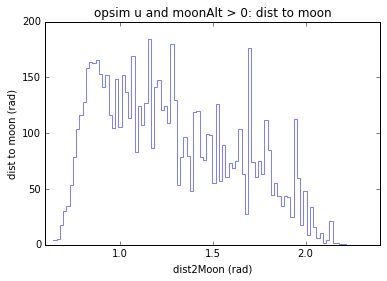

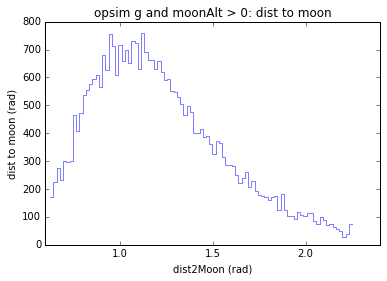

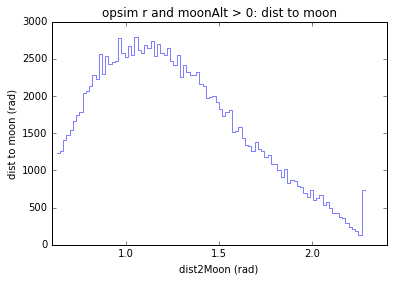

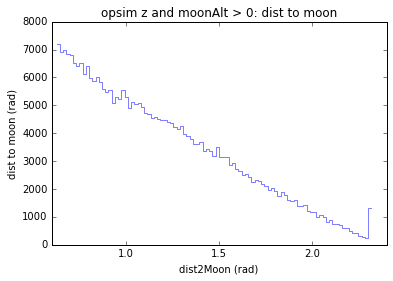

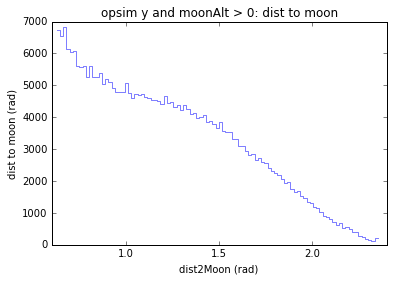

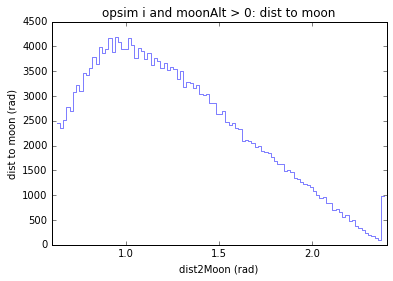

In [4]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

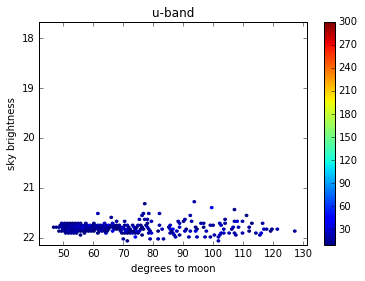

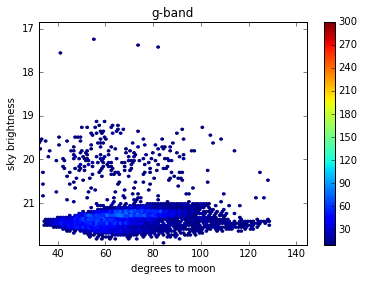

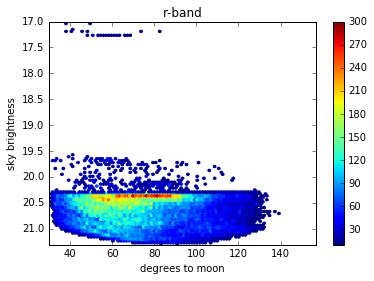

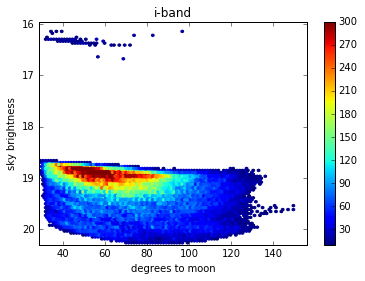

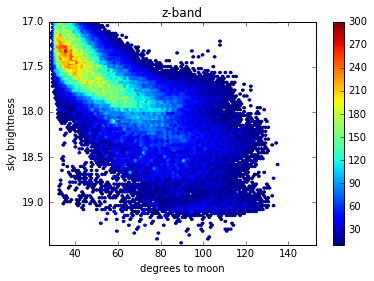

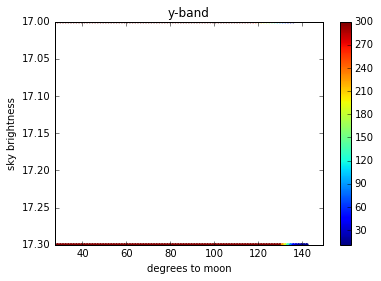

In [28]:
# lets plot z skybrightness vs moon dist
for filtername in filters:
    data = opsdb.fetchMetricData(['dist2Moon', 'filtSkyBrightness'], 'filter="%s" and moonAlt > 0' % filtername)
    plt.figure()
    plt.hexbin(np.degrees(data['dist2Moon']), data['filtSkyBrightness'], mincnt=10, vmax=300)
    plt.gca().invert_yaxis()
    plt.ylabel('sky brightness')
    plt.xlabel('degrees to moon')
    plt.title('%s-band' % filtername)
    plt.colorbar()